## Queue 

Simple queuing theory simulation, M/M/1 queue
Single server, single queue

***

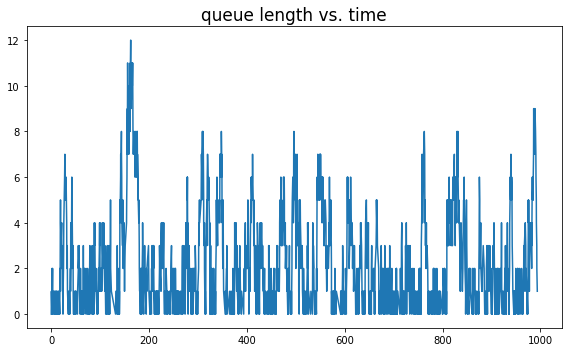

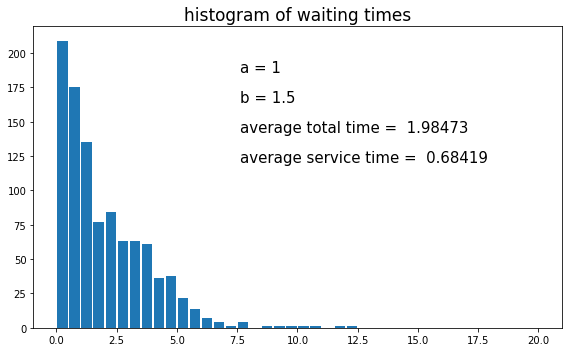

In [85]:
import numpy as np
from matplotlib import pyplot as plt 

a = 1    # average number of arrivals per minute
b = 1.5  # average number of people served per minute

numberOfCustomers = 1000

# Notation:
#  arrivalTime = person's arrival time into the queue
#  serviceTime = service time once they reach the front
#  finishTime  = finish time (includes waiting & service)

# initialize arrays:
arrivalTime = np.zeros(numberOfCustomers)  
finishTime = np.zeros(numberOfCustomers)

# Generate random arrival times assuming Poisson process:
randomNumber = np.random.rand(numberOfCustomers)
interarrivalTime = -1/a * np.log(randomNumber)   # Generate inter-arrival times, exponential distribution
arrivalTime[0] = interarrivalTime[0]             # Arrival time of first customer

for i in range(1,numberOfCustomers):
   arrivalTime[i] = arrivalTime[i-1] + interarrivalTime[i]  # arrival times of other customers

# Generate random service times for each customer:
randomNumber = np.random.rand(numberOfCustomers)
serviceTime = -1/b * np.log(randomNumber)   # service times for each

# Compute time each customer finishes:
finishTime[0] = arrivalTime[0] + serviceTime[0]  # finish time for first customer
for i in range(1,numberOfCustomers):
   # compute finish time for each customer as the larger of
   #   arrival time plus service time (if no wait)
   #   finish time of previous customer plus service time (if wait)
   finishTime[i] = np.max((arrivalTime[i]+serviceTime[i],  finishTime[i-1]+serviceTime[i]))

totalTime = finishTime - arrivalTime  # total time spent by each customer
queueTime = totalTime - serviceTime   # time spent waiting before being served

avgServiceTime = np.sum(serviceTime)/numberOfCustomers
avgQueueTime   = np.sum(queueTime)/numberOfCustomers
avgTotalTime   = np.sum(totalTime)/numberOfCustomers

# compute length of queue as a function of time.
# merge together the arrival and finish times and sort them
# into one list, keeping track of whether queue length changes by +1
# or -1 at each time:
eventTimes = np.append(arrivalTime,finishTime)

queueChange = np.append(np.ones(numberOfCustomers), -np.ones(numberOfCustomers))

sortedTimes = np.sort(eventTimes)
indexTimes  = np.argsort(eventTimes)
sortedChange = queueChange[indexTimes]

queueLength = np.zeros(2*numberOfCustomers)
for i in range(1,(2*numberOfCustomers)):
   queueLength[i] = queueLength[i-1] + sortedChange[i-1]

# plot histogram of waiting times:
plt.figure(figsize=(8,5))
ax = plt.plot(sortedTimes,queueLength)
plt.title('queue length vs. time', fontsize=17)
plt.tight_layout()
plt.show()

# plot histogram of profits over all simulations
fig, ax = plt.subplots(figsize =(8, 5), tight_layout = True) 
ax.hist(totalTime,np.arange(0,20.5,.5), rwidth=.85) 
plt.title('histogram of waiting times',fontsize=17)
# Annotate the histogram
ax.annotate('a = ' + str(a), xy=(240, 280), xycoords='figure points', fontsize=15)
ax.annotate('b = ' + str(b), xy=(240, 250), xycoords='figure points', fontsize=15)
ax.annotate("average total time = % 7.5f" % avgTotalTime, xy=(240, 220), xycoords='figure points', fontsize=15)
ax.annotate("average service time = % 7.5f" % avgServiceTime, xy=(240, 190), xycoords='figure points', fontsize=15)
plt.show()